In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib


# HIGGS EXPLORATORY DATA ANALYSIS NOTEBOOK

### Step 1 LOAD DATA & BASIC STRUCTURE

In [ ]:
# loading the data
pd.set_option("display.max_columns", 50)
sns.set(style="whitegrid")

DATA_PATH = "../Data/higgs_train.csv"
SAMPLE_FOR_PLOTS = 175001

# load
df = pd.read_csv(
    DATA_PATH,
    header=0,      
    low_memory=False
)

#numeric label for analasys original table has label 'b' en 's'
df["label"] = df["Label"].map({"b": 0, "s": 1}).astype("int8")
df = df.drop(columns=["Label"])   # delete old lable column

exclude_cols = ["label", "EventId", "eventId"]
feature_cols = [c for c in df.columns if c not in exclude_cols]

df[feature_cols] = df[feature_cols].astype("float32")

print("Shape:", df.shape)
display(df.head())

print("\nINFO:")
df.info()

print("\nRandom sample:")
display(df.sample(5, random_state=42))


Shape: (175000, 33)


,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,DER_met_phi_centrality,DER_lep_eta_centrality,PRI_tau_pt,PRI_tau_eta,PRI_tau_phi,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,label
0,138683,136.371994,32.141998,95.157997,24.011999,-999.000,-999.000000,-999.000,2.650,24.011999,81.013000,0.499,-0.976,-999.000,54.043999,-0.030,-1.466,26.969000,-1.637,0.641,40.636002,1.655,171.587997,0.0,-999.000000,-999.000,-999.000,-999.000000,-999.000,-999.000,0.000,4.585780,0
1,164939,123.147003,73.967003,73.065002,1.951000,-999.000,-999.000000,-999.000,3.181,1.951000,73.968002,2.106,1.064,-999.000,23.812000,1.477,-2.197,50.155998,0.805,0.977,27.278999,-2.199,41.860001,0.0,-999.000000,-999.000,-999.000,-999.000000,-999.000,-999.000,-0.000,5.005938,0
2,103954,114.195999,77.281998,84.580002,1.398000,-999.000,-999.000000,-999.000,2.808,1.398000,86.994003,1.752,-1.354,-999.000,31.613001,0.032,-1.295,55.381001,0.498,2.219,27.909000,-0.552,71.651001,0.0,-999.000000,-999.000,-999.000,-999.000000,-999.000,-999.000,-0.000,4.747560,0
3,220374,113.938004,37.713001,78.068001,73.541000,1.506,83.664001,0.344,2.062,2.179000,176.908005,0.670,1.380,0.946,55.591999,-1.102,-1.189,37.219002,-1.132,0.873,23.319000,-0.516,224.587006,2.0,45.738998,-1.707,2.192,38.358002,-0.202,-3.017,84.097,0.018636,1
4,272861,-999.000000,82.024002,55.707001,15.350000,-999.000,-999.000000,-999.000,1.943,15.350000,62.786999,1.461,-1.414,-999.000,25.509001,-1.108,2.158,37.278000,-0.121,-2.452,54.284000,-0.157,98.963997,0.0,-999.000000,-999.000,-999.000,-999.000000,-999.000,-999.000,-0.000,4.924326,0



INFO:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175000 entries, 0 to 174999
Data columns (total 33 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   EventId                      175000 non-null  int64  
 1   DER_mass_MMC                 175000 non-null  float32
 2   DER_mass_transverse_met_lep  175000 non-null  float32
 3   DER_mass_vis                 175000 non-null  float32
 4   DER_pt_h                     175000 non-null  float32
 5   DER_deltaeta_jet_jet         175000 non-null  float32
 6   DER_mass_jet_jet             175000 non-null  float32
 7   DER_prodeta_jet_jet          175000 non-null  float32
 8   DER_deltar_tau_lep           175000 non-null  float32
 9   DER_pt_tot                   175000 non-null  float32
 10  DER_sum_pt                   175000 non-null  float32
 11  DER_pt_ratio_lep_tau         175000 non-null  float32
 12  DER_met_phi_centrality       175000 non-null  float

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,DER_met_phi_centrality,DER_lep_eta_centrality,PRI_tau_pt,PRI_tau_eta,PRI_tau_phi,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,label
148789,278482,142.421005,59.257999,91.714996,66.805000,7.146,1418.562988,-12.443,2.380,20.000,181.686996,1.565,1.400,0.841,39.400002,-1.058,-0.571,61.655998,-0.917,1.806,29.865999,0.281,162.830002,2.0,46.634998,-3.005,-2.929,33.994999,4.140,-1.059,80.630997,0.001503,1
169618,309547,160.080002,54.362999,104.750000,47.493999,-999.000,-999.000000,-999.000,2.776,22.326,138.475998,1.462,1.414,-999.000,43.560001,-0.979,2.519,63.692001,-0.664,-0.239,24.413000,1.282,138.645996,1.0,31.224001,0.352,-2.752,-999.000000,-999.000,-999.000,31.224001,2.047677,0
131258,297207,-999.000000,106.498001,87.221001,8.133000,-999.000,-999.000000,-999.000,2.383,8.133,96.658997,1.691,-1.355,-999.000,35.915001,0.380,1.272,60.743999,0.599,-2.638,50.408001,-0.048,105.804001,0.0,-999.000000,-999.000,-999.000,-999.000000,-999.000,-999.000,-0.000000,4.634376,0
31864,271168,150.311005,9.304000,106.953003,248.904007,0.180,82.476997,0.001,1.344,2.056,452.095001,2.832,1.084,0.000,50.659000,-0.161,1.152,143.451996,-0.452,2.464,86.370003,2.380,459.385010,2.0,167.085007,0.185,-1.118,90.898003,0.005,-0.502,257.983002,0.002653,1
11032,269376,92.737000,7.174000,55.077000,33.039001,-999.000,-999.000000,-999.000,2.741,28.208,94.643997,0.917,-0.227,-999.000,29.146000,-0.861,1.735,26.719999,-1.102,-1.818,33.800999,-1.579,109.344002,1.0,38.778999,-1.988,0.421,-999.000000,-999.000,-999.000,38.778999,1.681611,0


In [3]:
# setup eventid as id
id_col = 'eventId' if 'eventId' in df.columns else None
feature_cols = [c for c in df.columns if c != id_col]

# making everything numerical
df[feature_cols] = (
    df[feature_cols]
    .apply(pd.to_numeric, errors='coerce')
    .astype(np.float32)
)

if 'label' in df.columns:
    df['label'] = df['label'].astype('int8')

print("\nafter conversion:")
df.info()



after conversion:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175000 entries, 0 to 174999
Data columns (total 33 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   EventId                      175000 non-null  float32
 1   DER_mass_MMC                 175000 non-null  float32
 2   DER_mass_transverse_met_lep  175000 non-null  float32
 3   DER_mass_vis                 175000 non-null  float32
 4   DER_pt_h                     175000 non-null  float32
 5   DER_deltaeta_jet_jet         175000 non-null  float32
 6   DER_mass_jet_jet             175000 non-null  float32
 7   DER_prodeta_jet_jet          175000 non-null  float32
 8   DER_deltar_tau_lep           175000 non-null  float32
 9   DER_pt_tot                   175000 non-null  float32
 10  DER_sum_pt                   175000 non-null  float32
 11  DER_pt_ratio_lep_tau         175000 non-null  float32
 12  DER_met_phi_centrality       175000 non

### STEP 2 DATA QUALITY CHECKS

In [4]:
# Missing values, duplicates, basic stats

print("Missing values per column:")
display(df.isna().sum().sort_values(ascending=False))
print("\nMissing % per column (top 20):")
display((df.isna().mean() * 100).sort_values(ascending=False).head(20))

# Duplicates
sample_size = min(len(df), 500000)
dup_sample = df.sample(sample_size, random_state=42)
n_dup = dup_sample.duplicated().sum()
print(f"\nDuplicated rows in sample of {sample_size}: {n_dup}")

print("\nDescriptive statistics:")
display(df.describe().T)


Missing values per column:


EventId                        0
PRI_lep_pt                     0
Weight                         0
PRI_jet_all_pt                 0
PRI_jet_subleading_phi         0
PRI_jet_subleading_eta         0
PRI_jet_subleading_pt          0
PRI_jet_leading_phi            0
PRI_jet_leading_eta            0
PRI_jet_leading_pt             0
PRI_jet_num                    0
PRI_met_sumet                  0
PRI_met_phi                    0
PRI_met                        0
PRI_lep_phi                    0
PRI_lep_eta                    0
PRI_tau_phi                    0
DER_mass_MMC                   0
PRI_tau_eta                    0
PRI_tau_pt                     0
DER_lep_eta_centrality         0
DER_met_phi_centrality         0
DER_pt_ratio_lep_tau           0
DER_sum_pt                     0
DER_pt_tot                     0
DER_deltar_tau_lep             0
DER_prodeta_jet_jet            0
DER_mass_jet_jet               0
DER_deltaeta_jet_jet           0
DER_pt_h                       0
DER_mass_v


Missing % per column (top 20):


EventId                   0.0
PRI_lep_pt                0.0
Weight                    0.0
PRI_jet_all_pt            0.0
PRI_jet_subleading_phi    0.0
PRI_jet_subleading_eta    0.0
PRI_jet_subleading_pt     0.0
PRI_jet_leading_phi       0.0
PRI_jet_leading_eta       0.0
PRI_jet_leading_pt        0.0
PRI_jet_num               0.0
PRI_met_sumet             0.0
PRI_met_phi               0.0
PRI_met                   0.0
PRI_lep_phi               0.0
PRI_lep_eta               0.0
PRI_tau_phi               0.0
DER_mass_MMC              0.0
PRI_tau_eta               0.0
PRI_tau_pt                0.0
dtype: float64


Duplicated rows in sample of 175000: 0

Descriptive statistics:


,count,mean,std,min,25%,50%,75%,max
EventId,175000.0,225110.515625,72144.070312,100000.000000,162570.500000,225152.500000,287590.250000,349999.000000
DER_mass_MMC,175000.0,-49.628613,407.190399,-999.000000,77.947748,104.933998,130.581245,988.198975
DER_mass_transverse_met_lep,175000.0,49.325138,35.356583,0.000000,19.306000,46.657501,73.627998,594.286987
DER_mass_vis,175000.0,81.233765,41.117317,6.329000,59.338751,73.708000,92.230003,1329.912964
DER_pt_h,175000.0,57.918804,63.730755,0.000000,14.060750,38.514500,79.256748,2834.999023
DER_deltaeta_jet_jet,175000.0,-708.004089,454.594055,-999.000000,-999.000000,-999.000000,0.496000,8.503000
DER_mass_jet_jet,175000.0,-600.483459,659.089600,-999.000000,-999.000000,-999.000000,83.633253,4974.979004
DER_prodeta_jet_jet,175000.0,-708.941284,453.263214,-999.000000,-999.000000,-999.000000,-4.564750,16.648001
DER_deltar_tau_lep,175000.0,2.372299,0.783175,0.208000,1.809000,2.489000,2.960000,5.655000
DER_pt_tot,175000.0,18.925816,22.683537,0.000000,2.841000,12.227500,27.563000,2834.999023


### STEP 3 TARGET / LABEL ANALYSIS


In [5]:
import time

start = time.time()
print(df["label"].value_counts())
end = time.time()

print("\nTime:", end - start)


label
0    115214
1     59786
Name: count, dtype: int64

Time: 0.008275985717773438


### STEP 4 UNIVARIATE FEATURE ANALYSIS

Plot sample shape: (175000, 33)


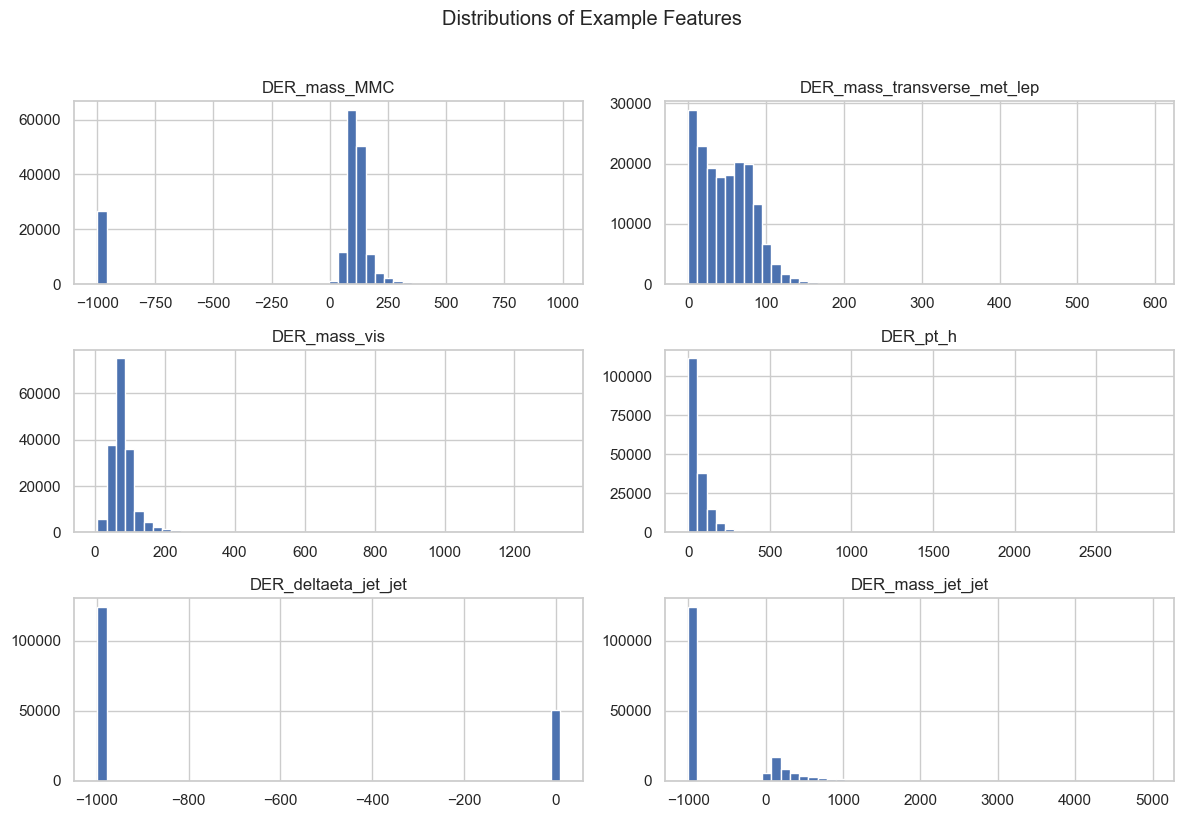

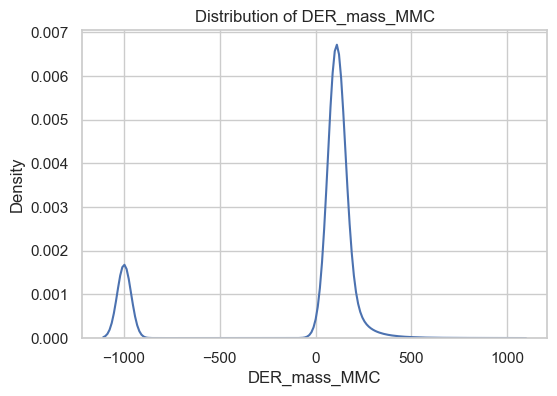

Feature stats


,mean,std,min,max,skew,kurtosis
EventId,225110.515625,72144.070312,100000.000000,349999.000000,-0.001363,-1.201583
DER_mass_MMC,-49.628613,407.190399,-999.000000,988.198975,-1.845567,1.595960
DER_mass_transverse_met_lep,49.325138,35.356583,0.000000,594.286987,1.193898,5.907350
DER_mass_vis,81.233765,41.117317,6.329000,1329.912964,3.785567,33.764767
DER_pt_h,57.918804,63.730755,0.000000,2834.999023,2.672138,28.128574
DER_deltaeta_jet_jet,-708.004089,454.594055,-999.000000,8.503000,0.922470,-1.149041
DER_mass_jet_jet,-600.483459,659.089600,-999.000000,4974.979004,1.414453,1.294598
DER_prodeta_jet_jet,-708.941284,453.263214,-999.000000,16.648001,0.922516,-1.148889
DER_deltar_tau_lep,2.372299,0.783175,0.208000,5.655000,-0.206881,-0.214230
DER_pt_tot,18.925816,22.683537,0.000000,2834.999023,13.393676,1371.808594


In [6]:
plot_df = df.sample(min(SAMPLE_FOR_PLOTS, len(df)), random_state=42)
print("Plot sample shape:", plot_df.shape)

# histogram
example_features = plot_df.columns[1:7]  # skip label and take 6 features
plot_df[example_features].hist(figsize=(12, 8), bins=50)
plt.suptitle("Distributions of Example Features", y=1.02)
plt.tight_layout()
plt.show()

# KDE for one feature
feat = plot_df.columns[1]
plt.figure(figsize=(6,4))
sns.kdeplot(data=plot_df, x=feat)
plt.title(f"Distribution of {feat}")
plt.show()

# Distribution stats
stats = pd.DataFrame({
    "mean": df.mean(numeric_only=True),
    "std": df.std(numeric_only=True),
    "min": df.min(numeric_only=True),
    "max": df.max(numeric_only=True),
    "skew": df.skew(numeric_only=True),
    "kurtosis": df.kurtosis(numeric_only=True)
})
print("Feature stats")
display(stats)


### STEP 5 BIVARIATE: FEATURES vs LABEL

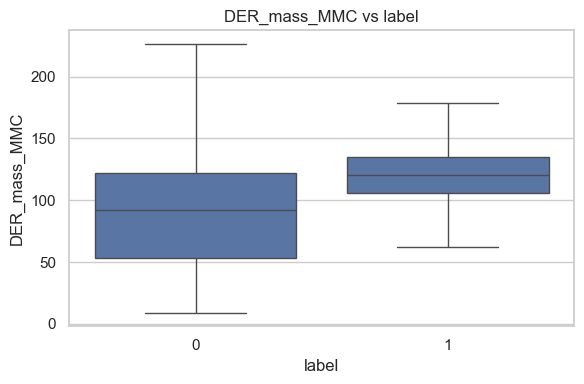

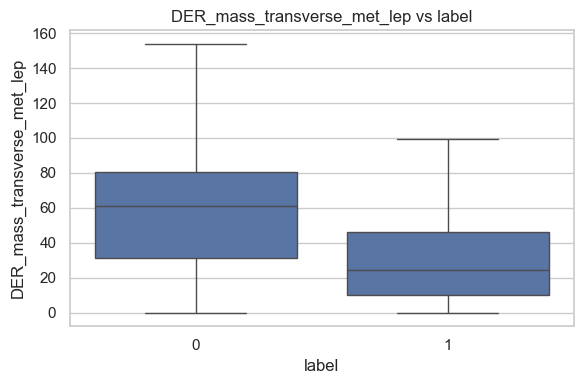

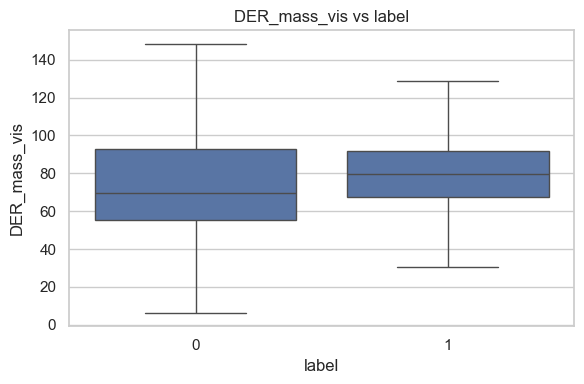

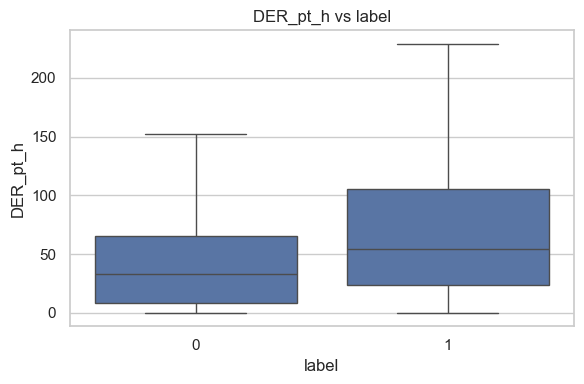

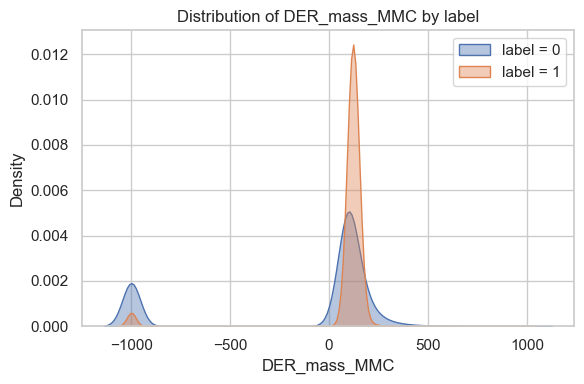

In [7]:
if "label" not in df.columns:
    if "Label" in df.columns:   # original b/s column
        df["label"] = df["Label"].map({"b": 0, "s": 1}).astype("int8")
    else:
        raise KeyError("No 'label' or 'Label' column found in df.")

# choose tbe numerical values you dont want
exclude_cols = ["label", "EventId", "eventId"]

numeric_cols = [
    c for c in df.columns
    if c not in exclude_cols and np.issubdtype(df[c].dtype, np.number)
]

features_for_box = numeric_cols[:4]           # first 4 features
plot_cols = ["label"] + features_for_box

plot_df = df[plot_cols].sample(
    min(SAMPLE_FOR_PLOTS, len(df)), random_state=42
).copy()

# Boxplots
for col in features_for_box:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x="label", y=col, data=plot_df, showfliers=False)
    plt.title(f"{col} vs label")
    plt.tight_layout()
    plt.show()

# density plot
feat = features_for_box[0]

plt.figure(figsize=(6, 4))
sns.kdeplot(
    data=plot_df[plot_df["label"] == 0],
    x=feat, label="label = 0", fill=True, alpha=0.4,
)
sns.kdeplot(
    data=plot_df[plot_df["label"] == 1],
    x=feat, label="label = 1", fill=True, alpha=0.4,
)
plt.title(f"Distribution of {feat} by label")
plt.legend()
plt.tight_layout()
plt.show()


### STEP 6 CORRELATION & TOP FEATURES

Top correlations


Weight                        -0.630393
DER_mass_transverse_met_lep   -0.349912
DER_met_phi_centrality         0.272067
DER_mass_MMC                   0.237973
PRI_tau_pt                     0.235510
DER_pt_ratio_lep_tau          -0.195062
DER_pt_h                       0.193642
DER_mass_jet_jet               0.192258
PRI_jet_leading_pt             0.159056
DER_sum_pt                     0.154845
PRI_jet_leading_eta            0.151845
PRI_jet_leading_phi            0.151844
DER_deltaeta_jet_jet           0.141906
DER_lep_eta_centrality         0.141603
PRI_jet_subleading_eta         0.141525
Name: label, dtype: float64

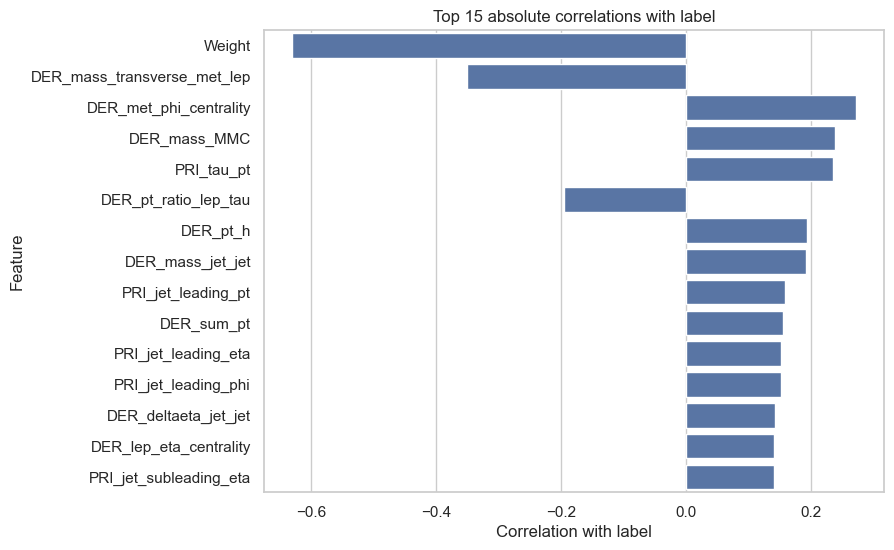

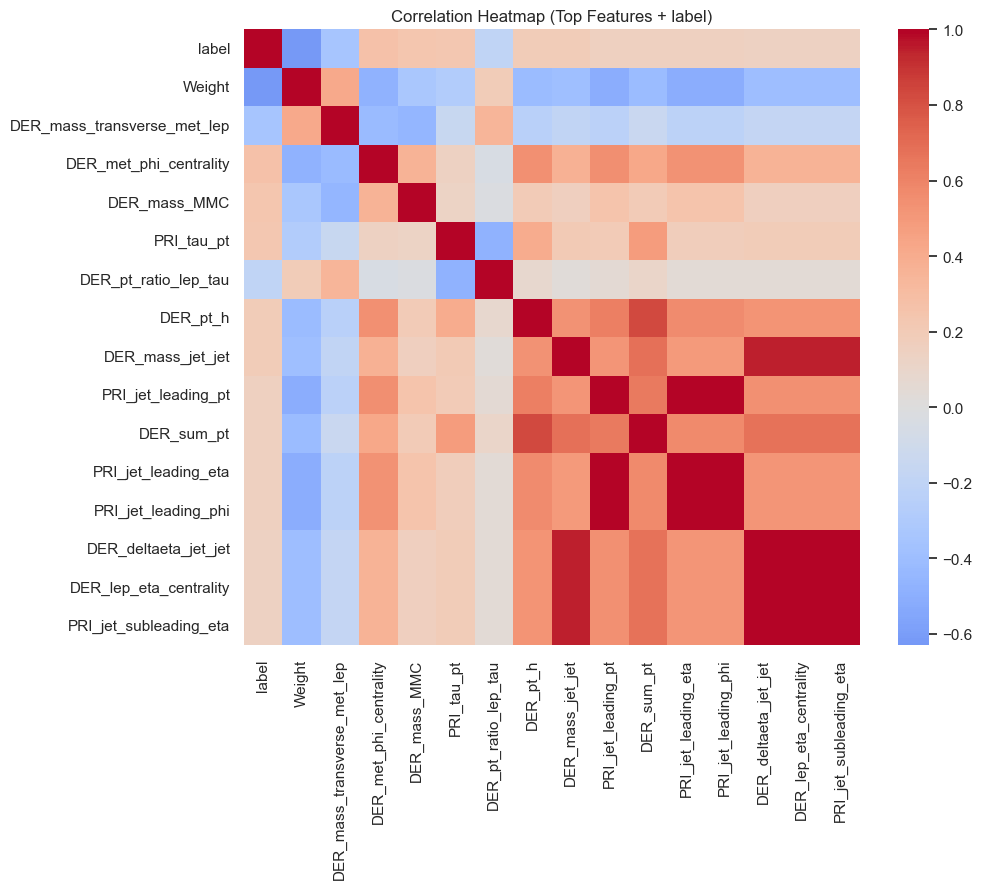

In [8]:
# corr matrix
corr = df.corr(numeric_only=True)

# correlation matrix
corr_with_label = corr["label"].drop("label").sort_values(
    key=np.abs, ascending=False
)

print("Top correlations")
display(corr_with_label.head(15))

# Barplot
top_n = 15
top_corr = corr_with_label.head(top_n)

plt.figure(figsize=(8,6))
sns.barplot(x=top_corr.values, y=top_corr.index)
plt.title(f"Top {top_n} absolute correlations with label")
plt.xlabel("Correlation with label")
plt.ylabel("Feature")
plt.show()

# Correlation heatmap
top_features = ["label"] + list(top_corr.index)
corr_top = corr.loc[top_features, top_features]

plt.figure(figsize=(10,8))
sns.heatmap(corr_top, annot=False, cmap="coolwarm", center=0, square=True)
plt.title("Correlation Heatmap (Top Features + label)")
plt.show()


### STEP 7 MULTIVARIATE VIEW (PCA 2D)

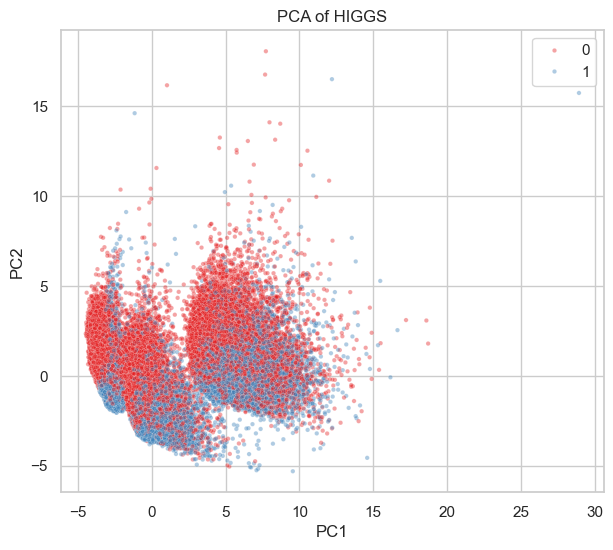

Explained variance ratio [0.39184543 0.07826629]


In [9]:
feature_cols = [c for c in df.columns if c != "label"]

pca_sample = df.sample(min(SAMPLE_FOR_PLOTS, len(df)), random_state=42)
X = pca_sample[feature_cols].values
y = pca_sample["label"].values

# Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA 2 components
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

pca_df = pd.DataFrame({
    "PC1": X_pca[:, 0],
    "PC2": X_pca[:, 1],
    "label": y
})

plt.figure(figsize=(7,6))
sns.scatterplot(
    data=pca_df,
    x="PC1", y="PC2",
    hue="label",
    alpha=0.4,
    s=10,
    palette="Set1"
)
plt.title("PCA of HIGGS")
plt.legend()
plt.show()

print("Explained variance ratio", pca.explained_variance_ratio_)


### STEP 8 FEATURE ENGINEERING CHECKS

In [10]:
unique_ratio = df.nunique() / len(df)
print("Unique ratio per column (lowest 10):")
display(unique_ratio.sort_values().head(10))

print("""
Feature engineering ideas:
- Drop features with extremely low variance (near-constant).
- Use StandardScaler for models like logistic regression / NN.
- Consider tree-based models (XGBoost, RandomForest) for non-linearities.
- If class imbalance is strong: use class weights or resampling.
- For huge size: start modeling on a subsample, then scale up.
""")


Unique ratio per column (lowest 10):


label                     0.000011
PRI_jet_num               0.000023
DER_lep_eta_centrality    0.005726
DER_met_phi_centrality    0.016166
DER_deltar_tau_lep        0.026223
PRI_tau_eta               0.028394
PRI_lep_eta               0.028463
DER_pt_ratio_lep_tau      0.031703
PRI_jet_subleading_phi    0.035903
PRI_lep_phi               0.035909
dtype: float64


Feature engineering ideas:
- Drop features with extremely low variance (near-constant).
- Use StandardScaler for models like logistic regression / NN.
- Consider tree-based models (XGBoost, RandomForest) for non-linearities.
- If class imbalance is strong: use class weights or resampling.
- For huge size: start modeling on a subsample, then scale up.

